In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import shutil

In [2]:
# Read the GeoPackage file
data = gpd.read_file('80E_7N.gpkg')
data.crs = 'EPSG:4326'
data2 = gpd.read_file('90W_3S.gpkg')
data2.crs = 'EPSG:4326'
land = gpd.read_file('globalLand.gpkg')
land.crs = 'EPSG:4326'

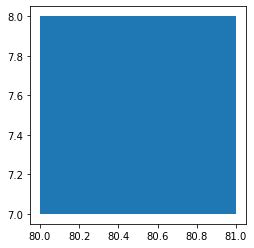

In [3]:
# Plot the GeoPackage data
data.plot()
# Display the plot
plt.show()

No handles with labels found to put in legend.


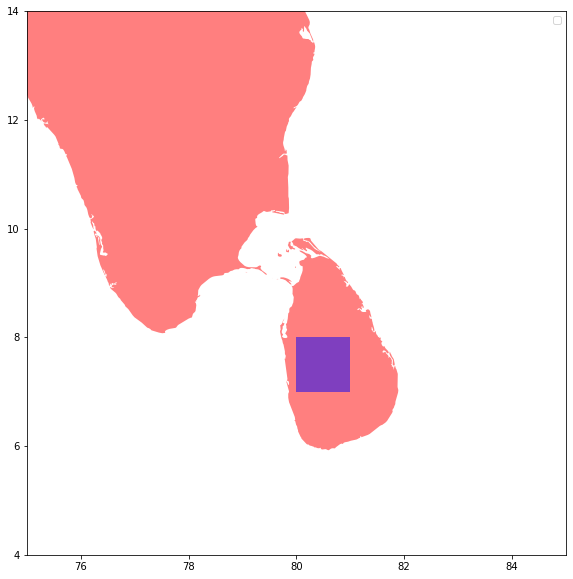

In [4]:
# Plot the data
fig, ax = plt.subplots(figsize=(10, 10))

land.plot(ax=ax, color='red', alpha=0.5, label='Land ')
data.plot(ax=ax, color='blue', alpha=0.5, label='Data 1')

# Set x-axis and y-axis limits
ax.set_xlim(75, 85)
ax.set_ylim(4, 14)


# Add a legend
ax.legend()

# Show the plot
plt.show()

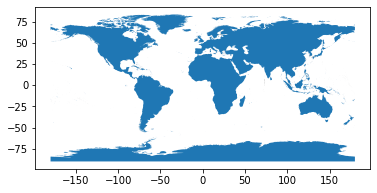

In [5]:
# Select the first geometry ### has issue 
#geometry = land['geometry'][0]

# Create a new GeoDataFrame with the selected geometry
#land_selected = gpd.GeoDataFrame(geometry=[geometry])

# Plot the GeoPackage data
land.plot()
# Display the plot
plt.show()

In [6]:
#Perform spatial overlay between two GeoDataFrames.
intersection = gpd.overlay(data, land, how='intersection')
intersection



,id,featurecla,scalerank,min_zoom,geometry
0,1,Land,0.0,1.0,"POLYGON ((80.00000 8.00000, 81.00000 8.00000, ..."


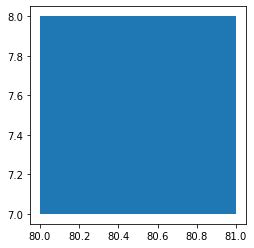

In [7]:
# Plot the GeoPackage data
intersection.plot()
# Display the plot
plt.show()

In [10]:
if any(bool_list):
    print("True exists in the list.")
    # Perform further actions if True is found
else:
    print("True does not exist in the list.")

True does not exist in the list.


In [9]:
bool_list = data2.intersects(land)

/home/xiongl/.local/lib/python3.8/site-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


In [12]:
# get list of all tiles 
# path of tiles 
## /gpfs/data1/vclgp/xiongl/GEDIglobal/tiles
import os

# Specify the directory path
directory = '/gpfs/data1/vclgp/xiongl/GEDIglobal/pythonTiles/tiles'
#directory = 'z:/vclgp/xiongl/GEDIglobal/pythonTest/tiles'



# List all files in the directory
files = os.listdir(directory)
print(len(files ))



48


In [13]:
print(directory +'/' + files[1] )

/gpfs/data1/vclgp/xiongl/GEDIglobal/pythonTiles/tiles/180W_30S.gpkg


In [14]:
import warnings
# Ignore warnings temporarily
warnings.filterwarnings("ignore")
n = 1
# Print the list of files[:50]
for file in files:
    f = directory +'/' +file
    #print(f)
    # Read the GeoPackage file
    data = gpd.read_file(f)
    data.crs = 'EPSG:4326'
    intersection = gpd.overlay(data, land, how='intersection')
    #bool_list = data.intersects(land)
    # Print the result
    if not intersection.empty:
      #print("The geometries have overlaps.")
      print('number: ' + str(n) + ' file: ' + str(f))
      n = n + 1
      # Copy the file
      shutil.copy(f, 'data/')

number: 1 file: /gpfs/data1/vclgp/xiongl/GEDIglobal/pythonTiles/tiles/90W_30S.gpkg
number: 2 file: /gpfs/data1/vclgp/xiongl/GEDIglobal/pythonTiles/tiles/180W_30S.gpkg
number: 3 file: /gpfs/data1/vclgp/xiongl/GEDIglobal/pythonTiles/tiles/90W_0N.gpkg
number: 4 file: /gpfs/data1/vclgp/xiongl/GEDIglobal/pythonTiles/tiles/120W_30N.gpkg
number: 5 file: /gpfs/data1/vclgp/xiongl/GEDIglobal/pythonTiles/tiles/120E_30N.gpkg
number: 6 file: /gpfs/data1/vclgp/xiongl/GEDIglobal/pythonTiles/tiles/120W_30S.gpkg
number: 7 file: /gpfs/data1/vclgp/xiongl/GEDIglobal/pythonTiles/tiles/150W_30S.gpkg
number: 8 file: /gpfs/data1/vclgp/xiongl/GEDIglobal/pythonTiles/tiles/30E_30N.gpkg
number: 9 file: /gpfs/data1/vclgp/xiongl/GEDIglobal/pythonTiles/tiles/180W_30N.gpkg
number: 10 file: /gpfs/data1/vclgp/xiongl/GEDIglobal/pythonTiles/tiles/90W_60S.gpkg
number: 11 file: /gpfs/data1/vclgp/xiongl/GEDIglobal/pythonTiles/tiles/120E_60S.gpkg
number: 12 file: /gpfs/data1/vclgp/xiongl/GEDIglobal/pythonTiles/tiles/30W_0N.g

In [16]:
######## merge gpkg files and save in shp format
# get list of all tiles 
# path of tiles 
## /gpfs/data1/vclgp/xiongl/GEDIglobal/tiles
import os

# Specify the directory path
directory = '/gpfs/data1/vclgp/xiongl/GEDIglobal/pythonTiles/tilesFilter/data/'

# List all files in the directory
files = os.listdir(directory)
print(len(files ))


45


In [30]:
print(directory + files[1] )

/gpfs/data1/vclgp/xiongl/GEDIglobal/pythonTest/tilesFilter/data/57E_24N.gpkg


In [17]:
import pandas as pd

# Create an empty GeoDataFrame to store the merged data
merged_gdf = gpd.GeoDataFrame()

# Iterate over the GPKG files and append their data to the merged GeoDataFrame
for file in files:
    #print(file)
    gdf = gpd.read_file(directory + file )
    merged_gdf = pd.concat([merged_gdf, gdf], ignore_index=True)

In [18]:
# Save the GeoDataFrame as a shapefile
merged_gdf.to_file('globalGrid', driver='ESRI Shapefile', overwrite=True)

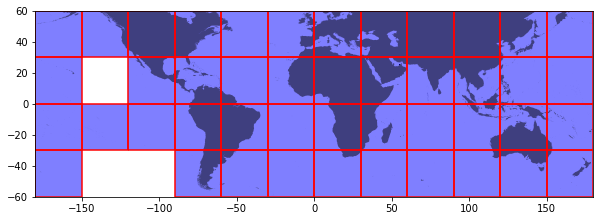

In [23]:
# Plot the data
fig, ax = plt.subplots(figsize=(10, 10))

merged_gdf.plot(ax=ax, color='blue', alpha=0.5, label='Land Grid ')
# Plot the boundary
merged_gdf.boundary.plot(ax=ax, color='red', linewidth=1.5)
# Plot the GeoPackage data
land.plot(ax=ax, color='black', alpha=0.5, label='Land surface')


# Set x-axis and y-axis limits
ax.set_xlim(-180, 180)
ax.set_ylim(-60, 60)


# Show the plot
plt.show()
